In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Exploration

## Class frequencies

In [8]:
df_train["Class"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

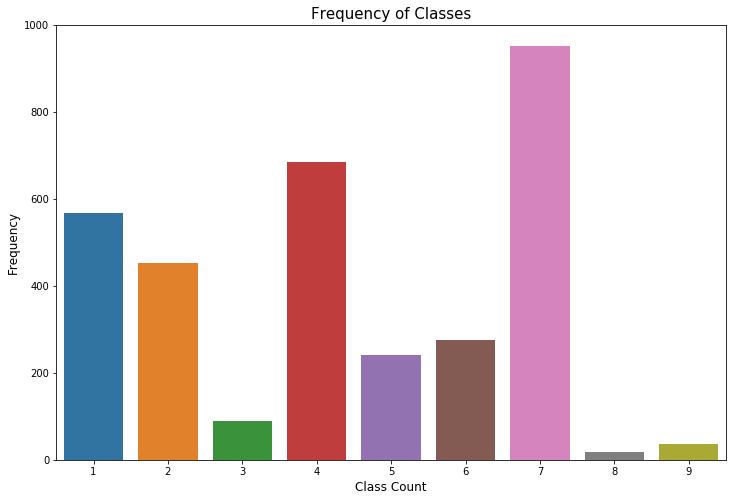

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=df_train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks()
plt.title("Frequency of Classes", fontsize=15)
plt.show()

## Counting words/characters

In [10]:
df_train_count = df_train.iloc[:,0:4]
df_test_count = df_test.iloc[:,0:3]

df_train_count.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [11]:
df_train_count["Text_num_words"] = df_train["Text"].apply(lambda x: len(str(x).split()) )
df_train_count["Text_num_chars"] = df_train["Text"].apply(lambda x: len(str(x)) )

df_train_count.head()

,ID,Gene,Variation,Class,Text_num_words,Text_num_chars
0,0,FAM58A,Truncating Mutations,1,6089,39765
1,1,CBL,W802*,2,5722,36831
2,2,CBL,Q249E,2,5722,36831
3,3,CBL,N454D,3,5572,36308
4,4,CBL,L399V,4,6202,41427


In [12]:
df_test_count["Text_num_words"] = df_test["Text"].apply(lambda x: len(str(x).split()) )
df_test_count["Text_num_chars"] = df_test["Text"].apply(lambda x: len(str(x)) )

df_test_count.head()

,ID,Gene,Variation,Text_num_words,Text_num_chars
0,0,ACSL4,R570S,7417,49925
1,1,NAGLU,P521L,4706,31460
2,2,PAH,L333F,11080,75419
3,3,ING1,A148D,8376,54100
4,4,TMEM216,G77A,11159,77127


In [13]:
df_train_count.iloc[:,4:6].describe()

,Text_num_words,Text_num_chars
count,3321.000000,3321.000000
mean,9542.505872,63865.607347
std,7845.251814,52373.220342
min,1.000000,3.000000
25%,4733.000000,31450.000000
50%,6871.000000,46292.000000
75%,11996.000000,80347.000000
max,76708.000000,525740.000000


In [14]:
df_test_count.iloc[:,3:5].describe()

,Text_num_words,Text_num_chars
count,5668.000000,5668.000000
mean,8467.367502,56593.931898
std,3553.477010,23807.243772
min,1.000000,3.000000
25%,6381.500000,42824.750000
50%,8342.000000,55647.500000
75%,10202.000000,68205.500000
max,73558.000000,489300.000000


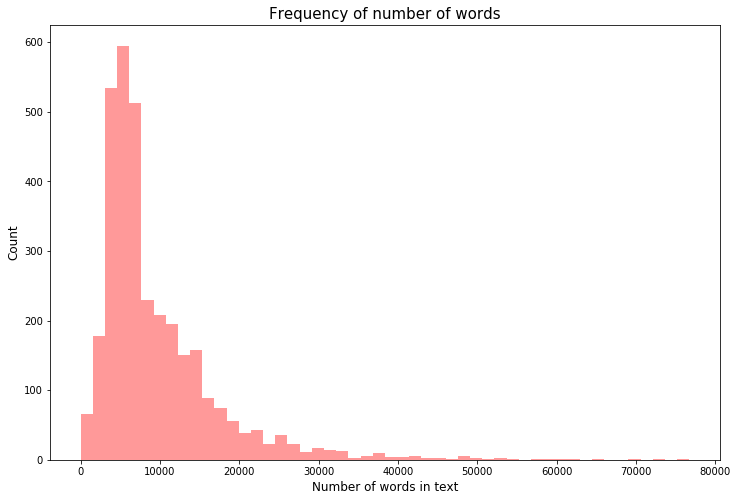

In [15]:
plt.figure(figsize=(12, 8))
sns.distplot(df_train_count.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

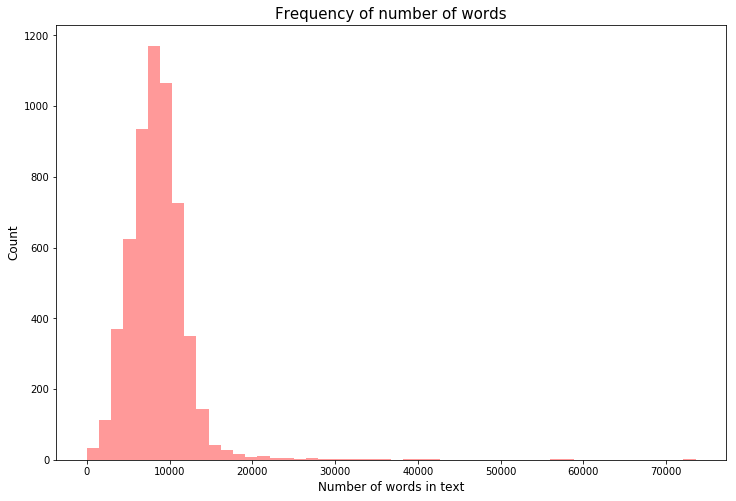

In [16]:
plt.figure(figsize=(12, 8))
sns.distplot(df_test_count.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

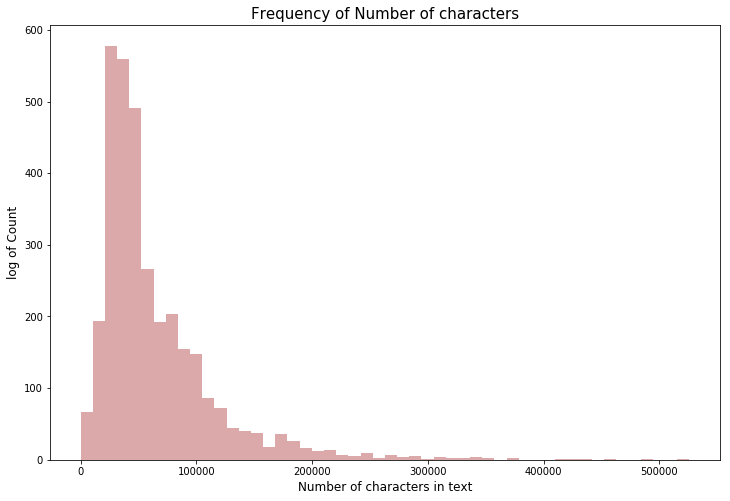

In [17]:
plt.figure(figsize=(12, 8))
sns.distplot(df_train_count.Text_num_chars.values, bins=50, kde=False, color='brown')
plt.xlabel('Number of characters in text', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.title("Frequency of Number of characters", fontsize=15)
plt.show()

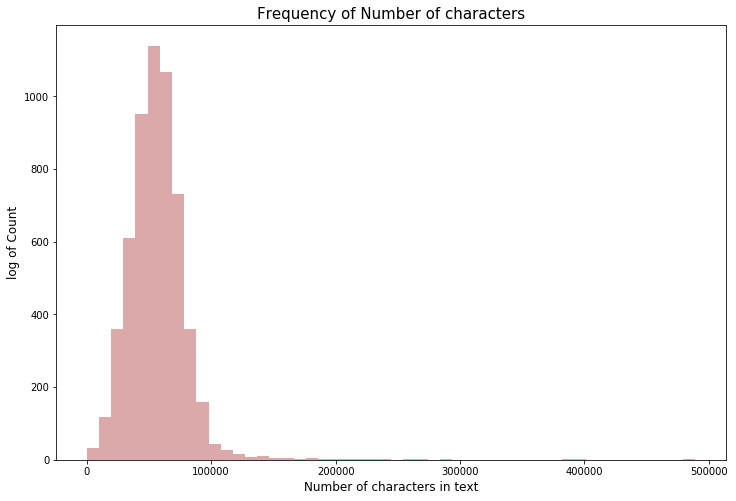

In [18]:
plt.figure(figsize=(12, 8))
sns.distplot(df_test_count.Text_num_chars.values, bins=50, kde=False, color='brown')
plt.xlabel('Number of characters in text', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.title("Frequency of Number of characters", fontsize=15)
plt.show()

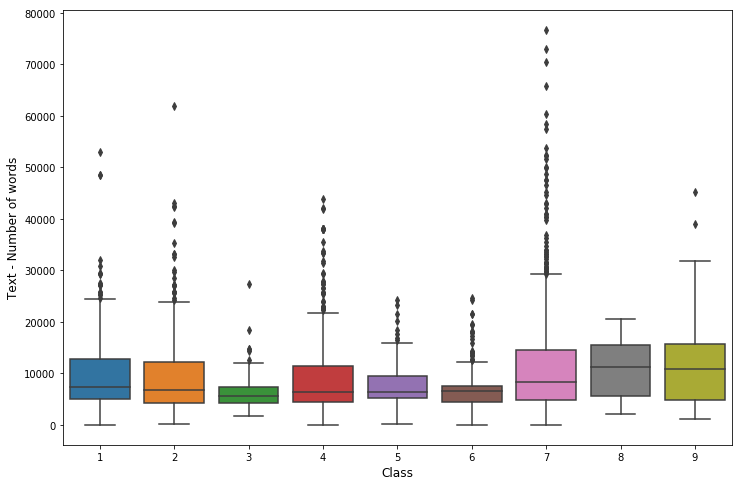

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_words', data=df_train_count)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

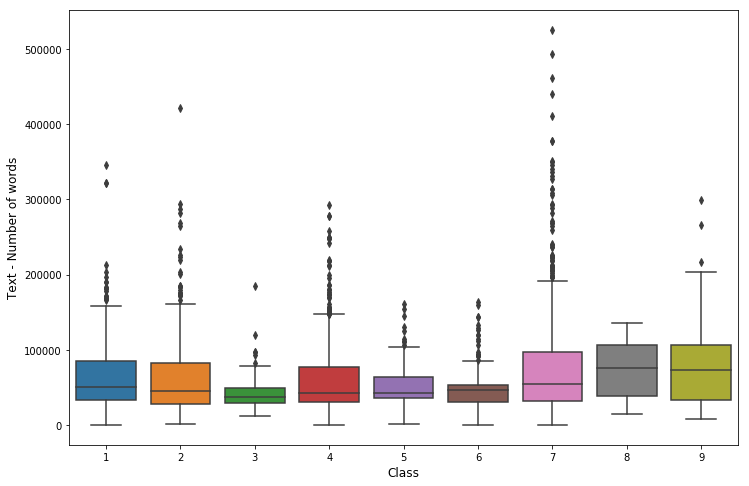

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_chars', data=df_train_count)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

# Genes Exploration

Genes that appear less than 2 times: 26.89%
Genes that appear less than 5 times: 53.03%
Genes that appear less than 10 times: 71.59%
Genes that appear less than 20 times: 82.95%
Genes that appear less than 50 times: 95.08%
Genes that appear less than 100 times: 98.11%
Genes that appear less than 200 times: 99.62%
Genes that appear less than 300 times: 100.0%


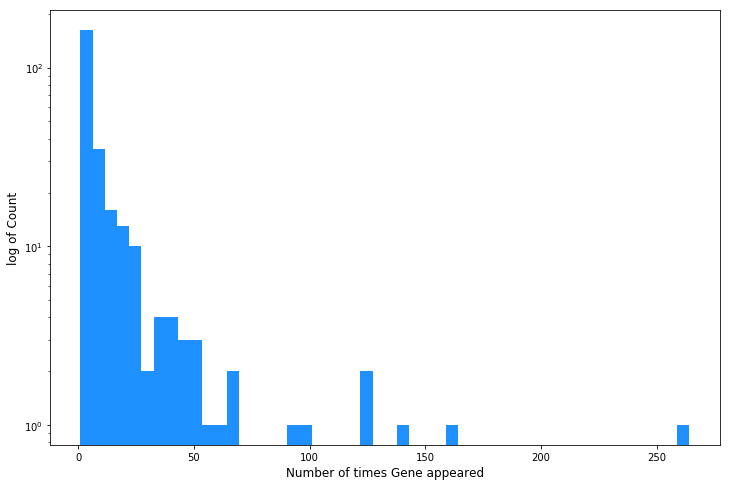

In [21]:
train_genes = df_train.groupby("Gene")['Gene'].count()

for i in [2, 5, 10, 20, 50, 100, 200, 300]:
    print('Genes that appear less than {} times: {}%'.format(i, round((train_genes < i).mean() * 100, 2)))

plt.figure(figsize=(12, 8))
plt.hist(train_genes.values, bins=50, log=True, color = 'dodgerblue')
plt.xlabel('Number of times Gene appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [22]:
top_genes = train_genes.sort_values(ascending=False)[:15]
print("Genes with maximal occurences\n", top_genes)

Genes with maximal occurences
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
Name: Gene, dtype: int64


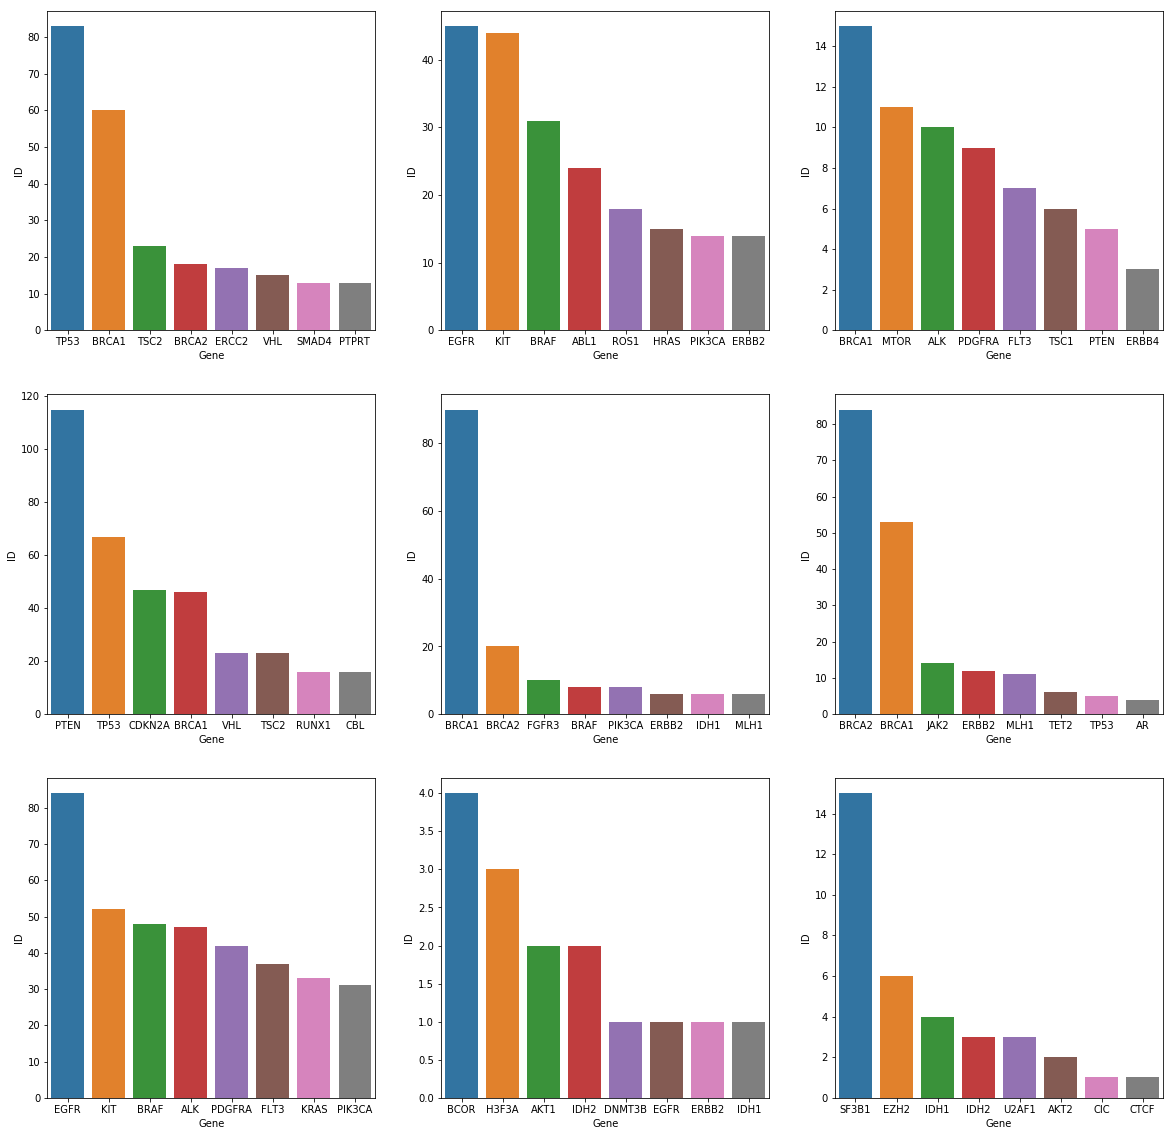

In [23]:
# class 1,2,3
#       4,5,6
#       7,8,9

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

for i in range(3):
    for j in range(3):
        genes_count = df_train[df_train["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_genes = genes_count.sort_values('ID', ascending=False)
        top_8_genes = sorted_genes[:8]
        sns.barplot(x="Gene", y="ID", data=top_8_genes, ax=axs[i][j])

# Variants Exploration

Variants that appear less than 2 times: 98.33%
Variants that appear less than 3 times: 99.63%
Variants that appear less than 5 times: 99.83%
Variants that appear less than 50 times: 99.9%
Variants that appear less than 100 times: 100.0%


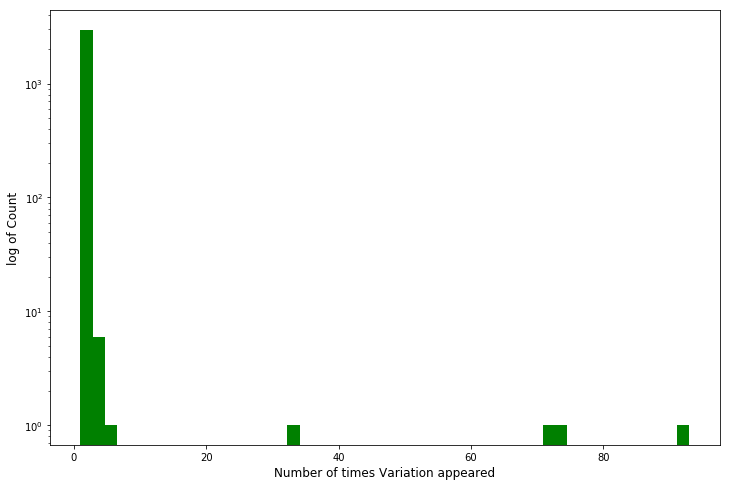

In [26]:
train_variants = df_train.groupby('Variation')['Variation'].count()

for i in [2,3,5,50,100]:
    print('Variants that appear less than {} times: {}%'.format(i, round((train_variants < i).mean() * 100, 2)))

plt.figure(figsize=(12, 8))
plt.hist(train_variants.values, bins=50, log=True, color='green')
plt.xlabel('Number of times Variation appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [27]:
top_variants = train_variants.sort_values(ascending=False)[:15]
print("Variants with maximal occurences\n", top_variants)

Variants with maximal occurences
 Variation
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
E17K                     3
T58I                     3
Q61L                     3
Q61R                     3
Q61H                     3
ETV6-NTRK3 Fusion        2
T286A                    2
P34R                     2
EWSR1-ETV1 Fusion        2
Name: Variation, dtype: int64


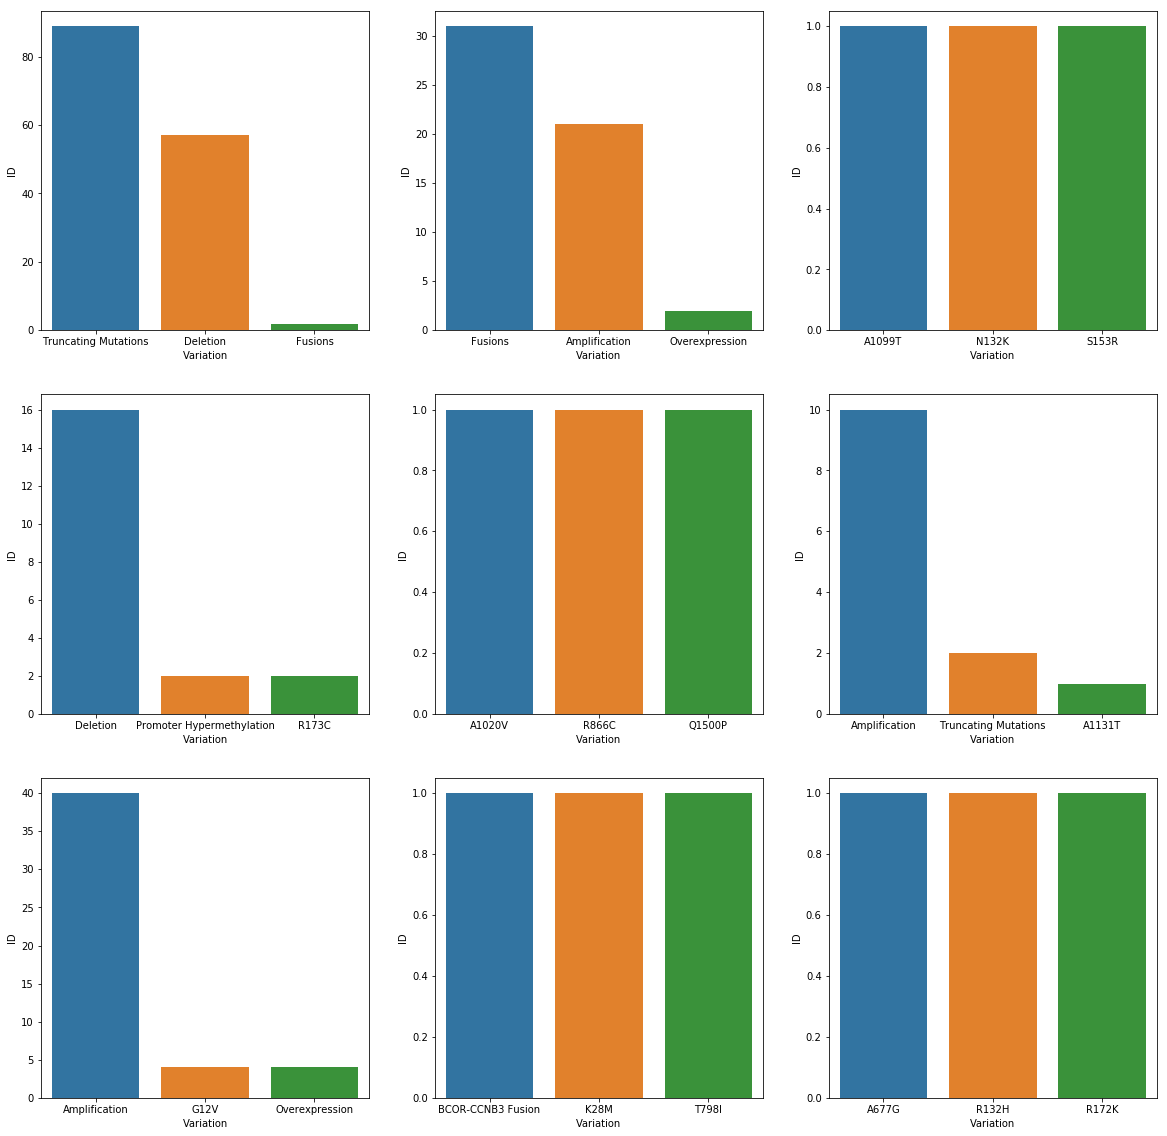

In [33]:
# class 1,2,3
#       4,5,6
#       7,8,9

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

for i in range(3):
    for j in range(3):
        variants_count = df_train[df_train["Class"]==((i*3+j)+1)].groupby('Variation')["ID"].count().reset_index()
        sorted_variants = variants_count.sort_values('ID', ascending=False)
        top_3_variants = sorted_variants[:3]
        sns.barplot(x="Variation", y="ID", data=top_3_variants, ax=axs[i][j])